In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',500)

In [2]:
chk_size=300000

In [3]:
df_chunk=pd.read_csv('XYZCorp_LendingData.csv',chunksize=chk_size)

In [4]:
chuck_list=[]

In [5]:
for i in df_chunk:
    chuck_list.append(i)

In [6]:
df=pd.DataFrame()

In [7]:
df=pd.concat(chuck_list)

In [8]:
df.shape

(855969, 73)

# Data Pre-processing

### 1. Removing identifiers from data
### 2. Missing value treatment
### 3. Unique value treatment

In [9]:
df['issue_d']=pd.to_datetime(df.issue_d.str.upper(), format='%b-%y', yearfirst=False)

In [10]:
# Dropping Identifiers columns from data

df.drop(['member_id'],axis=1,inplace=True)
df.drop(['id'],axis=1,inplace=True)

In [11]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,1.000000,50.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,8.000000,188.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


In [12]:
# Checking for NA values in every column

pd.options.display.max_rows=100
(df.isnull().sum()/df.shape[0])*100

loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.776261
emp_length                      5.030673
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_d                         0.000000
pymnt_plan                      0.000000
desc                           85.769111
purpose                         0.000000
title                           0.003855
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_cr_line                0.000000
inq_last_6mths                  0.000000
mths_since_last_

In [13]:
# Getting features with more than 75% NA's

feature_remove=[]
for i in df.columns:
    val=(df[i].isnull().sum()/df.shape[0])*100
    if val>75:
        feature_remove.append(i)
print(feature_remove)

['desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [14]:
# Dropping features with more than 75% NA's

for i in feature_remove:
    df.drop([i],axis=1,inplace=True)

In [15]:
df.shape

(855969, 51)

In [16]:
# Checking for duplicates in data

dups=df.duplicated()

In [17]:
print(dups.any()) #no duplicates found

False


In [18]:
# Dropping 'zip_code' becaue it has 'xx' at end

df.drop(['zip_code'],axis=1,inplace=True)

In [19]:
# Finding columns with high bias data using ".nunique" function

for i in df.columns:
    if df[i].dtypes=='object':
        print(i,'',df[i].nunique(),'','percent:',np.round((df[i].nunique()/df.shape[0])*100,2))

term  2  percent: 0.0
grade  7  percent: 0.0
sub_grade  35  percent: 0.0
emp_title  290910  percent: 33.99
emp_length  11  percent: 0.0
home_ownership  6  percent: 0.0
verification_status  3  percent: 0.0
pymnt_plan  2  percent: 0.0
purpose  14  percent: 0.0
title  60954  percent: 7.12
addr_state  51  percent: 0.01
earliest_cr_line  697  percent: 0.08
initial_list_status  2  percent: 0.0
last_pymnt_d  97  percent: 0.01
next_pymnt_d  3  percent: 0.0
last_credit_pull_d  102  percent: 0.01
application_type  2  percent: 0.0


In [20]:
# Dropping categorical variables with high unique values

df.drop('emp_title',axis=1,inplace=True)
df.drop('title',axis=1,inplace=True)
df.drop('earliest_cr_line',axis=1,inplace=True)
df.drop('addr_state',axis=1,inplace=True)
df.drop('last_credit_pull_d',axis=1,inplace=True)
df.drop('last_pymnt_d',axis=1,inplace=True)

In [21]:
df.shape

(855969, 44)

In [22]:
# Imputing data with median cause data is skewed as shown by describe

def imputer(df):
    for i in df.columns:
        if df[i].dtypes=='int64' or df[i].dtypes=='float64':
            df[i].fillna(df[i].sort_values(ascending=True).median(),inplace=True)
        else:
            df[i].fillna(df[i].value_counts().index[0],inplace=True)
imputer(df)

# Exploratory Data Analysis

## Loan Status

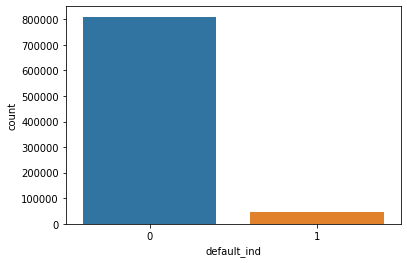

In [23]:
# Checking the distribution of target variable

sns.countplot(df['default_ind'])

Text(0.5, 1.0, 'Yearwise Distribution of defaulter')

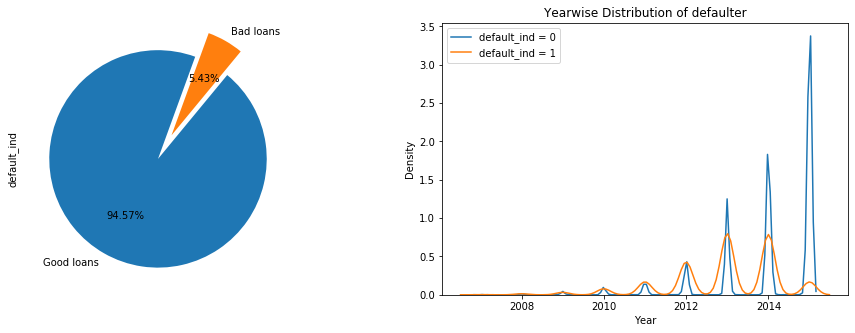

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
df['issue_year'] = df['issue_d'].dt.year
df['default_ind'].value_counts().plot.pie(explode=[0,0.25],labels=['Good loans','Bad loans'],
                                             autopct='%1.2f%%',startangle=70,ax=ax[0])
sns.kdeplot(df.loc[df['default_ind']==0,'issue_year'],label='default_ind = 0')
sns.kdeplot(df.loc[df['default_ind']==1,'issue_year'],label='default_ind = 1')
plt.xlabel('Year'); plt.ylabel('Density'); plt.title('Yearwise Distribution of defaulter')

## Loan Issued throughout past years

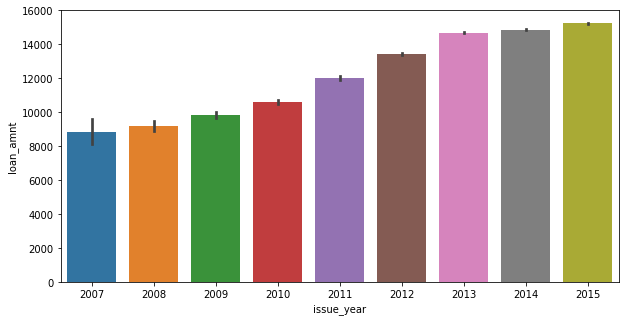

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='issue_year',y='loan_amnt',data=df)

# 2015 is the year when most loans were issued.
# Loans were issued in incremental manner.

In [26]:
# Dropping 'issue_year'

df.drop('issue_year',axis=1,inplace=True)

## Loan Grade 

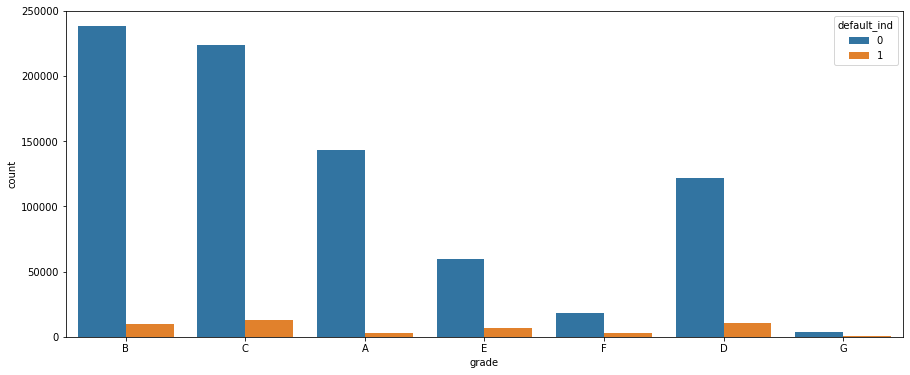

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(df['grade'], hue=df['default_ind'].sort_values(ascending=True))
plt.show()

In [28]:
grade=pd.crosstab(df['grade'],df['default_ind'])

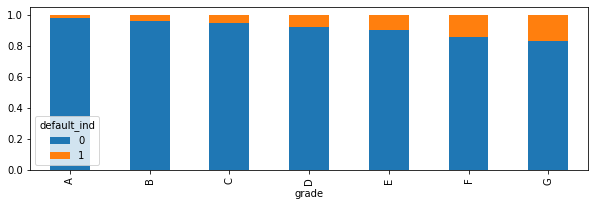

In [29]:
grade.div(grade.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,3))

Converting 'term' into categorical & 'emp_length' into numerical data type

In [30]:
df['term']=df['term'].apply(lambda x: x.rstrip('months'))
df['term']=df['term'].astype('object')

In [31]:
df['emp_length']=df['emp_length'].map({'10+ years':10,'< 1 year':0.5,'1 year':1,'3 years':3,'8 years':8,'9 years':9,
                      '4 years':4,'5 years':5,'6 years':6,'2 years':2,'7 years':7})

## Purpose of Loan


 * **Debt Consolidation** stands as clear winner for loan purpose, with more than 350K loans — or 58% from the total.<br

Other highlights include:

* <b>Credit Card</b>  —  more than 130K (~20%)
* <b>Home Improvement </b> —  more than 135K (~6%)
* <b>Other Purposes</b> — less than 30K (~4%)

Text(0.5, 1.0, 'Purpose of loan')

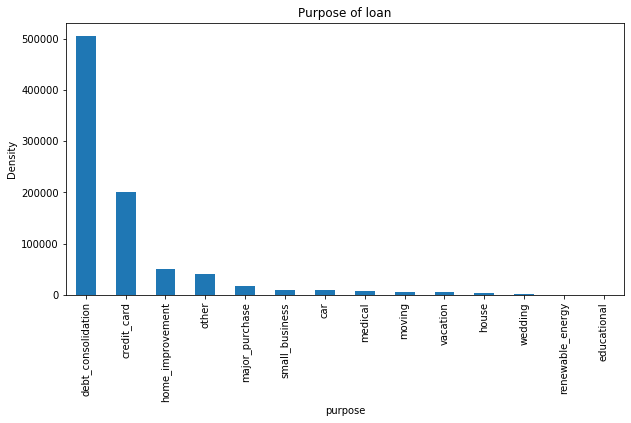

In [32]:
df.purpose.value_counts(ascending=False).plot.bar(figsize=(10,5))
plt.xlabel('purpose')
plt.ylabel('Density')
plt.title('Purpose of loan')

# Debt_consolidation is the major purpose for the loan issue

In [33]:
purpose=pd.crosstab(df['purpose'],df['default_ind'])

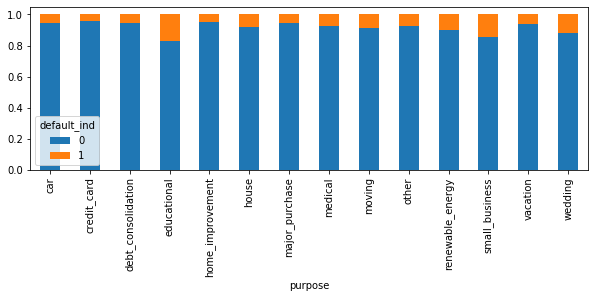

In [34]:
purpose.div(purpose.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,3))


## Loan Sub-grade

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

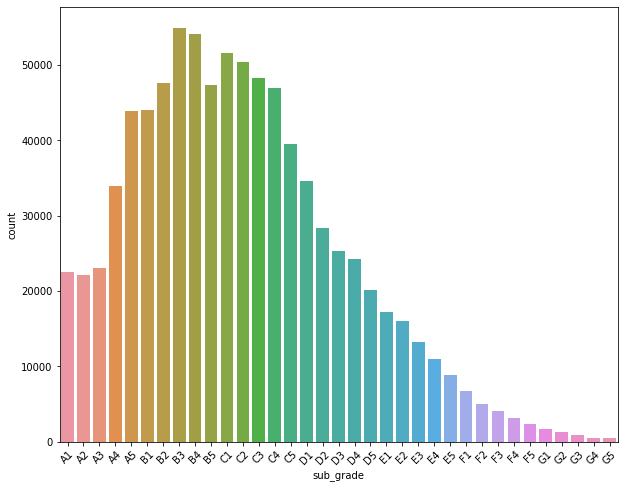

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(df['sub_grade'].sort_values(ascending=True))
plt.xticks(rotation=45)

In [36]:
#we have grade which gives adequate information dropping subgrade

df.drop('sub_grade',axis=1,inplace=True)

## Home Ownership 

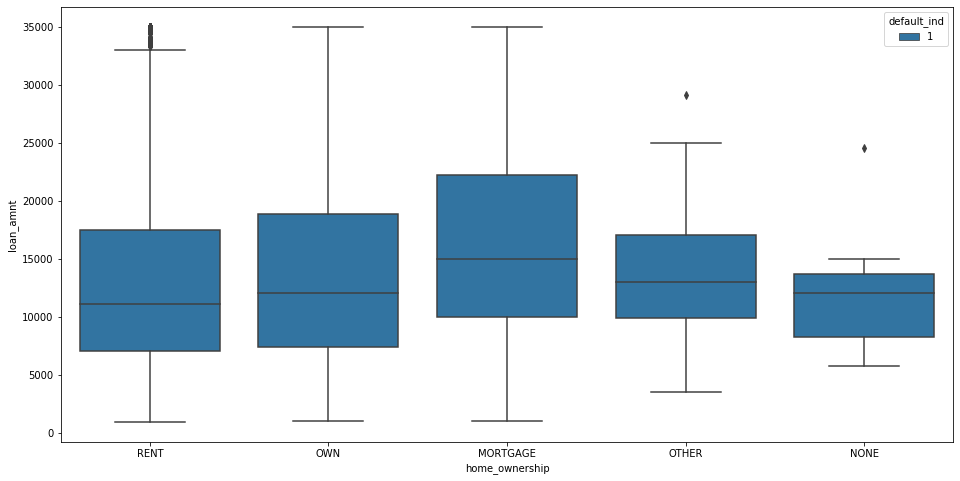

In [37]:
defaulter = df.loc[df['default_ind']==1]
plt.figure(figsize=(16,8))
sns.boxplot(data=defaulter,x = 'home_ownership',y='loan_amnt',hue='default_ind')

In [38]:
df.verification_status.value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

In [39]:
verification_status=pd.crosstab(df['verification_status'],df['default_ind'])

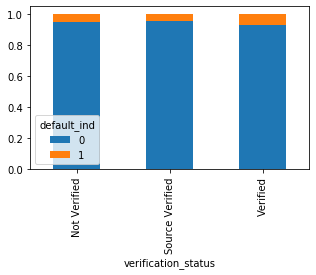

In [40]:
verification_status.div(verification_status.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(5,3))

In [41]:
df.term.value_counts()

 36     600221
 60     255748
Name: term, dtype: int64

In [42]:
term=pd.crosstab(df['term'],df['default_ind'])

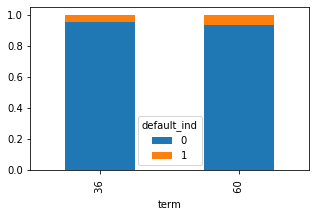

In [43]:
term.div(term.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(5,3))

In [44]:
df['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [45]:
pymnt_plan=pd.crosstab(df['pymnt_plan'],df['default_ind'])

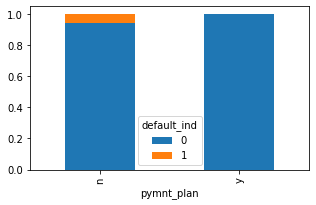

In [46]:
pymnt_plan.div(pymnt_plan.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(5,3))

In [47]:
#the distribution is 99-1%
df['pymnt_plan'].value_counts()/len(df)

n    0.999994
y    0.000006
Name: pymnt_plan, dtype: float64

In [48]:
df.drop('pymnt_plan',axis=1,inplace=True)

In [49]:
df['initial_list_status'].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

In [50]:
initial_list_status=pd.crosstab(df['initial_list_status'],df['default_ind'])

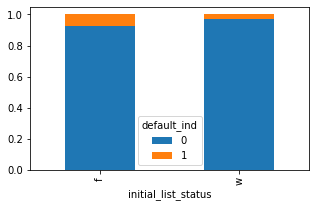

In [51]:
initial_list_status.div(initial_list_status.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(5,3))

In [52]:
df['next_pymnt_d'].value_counts()

Feb-16    787065
Jan-16     68838
Mar-16        66
Name: next_pymnt_d, dtype: int64

In [53]:
next_pymnt_d=pd.crosstab(df['next_pymnt_d'],df['default_ind'])

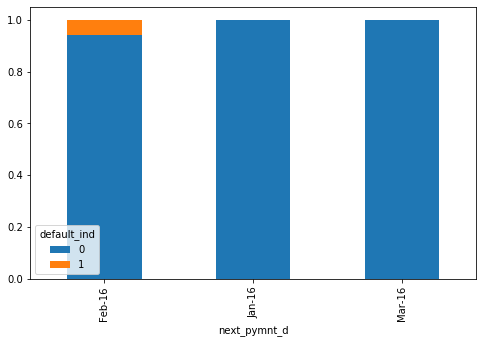

In [54]:
next_pymnt_d.div(next_pymnt_d.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,5))
plt.legend(loc='lower left',title='default_ind')

In [55]:
df.drop('next_pymnt_d',axis=1,inplace=True)

In [56]:
application_type=pd.crosstab(df['application_type'],df['default_ind'])

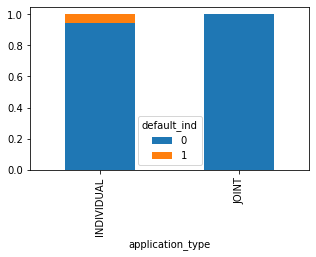

In [57]:
application_type.div(application_type.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(5,3))

In [58]:
df.application_type.value_counts()/len(df)*100

INDIVIDUAL    99.948363
JOINT          0.051637
Name: application_type, dtype: float64

In [59]:
df.drop('application_type',axis=1,inplace=True)

## Numeric data EDA

In [60]:
df_num=df.select_dtypes(include=['int64','float64'])

In [61]:
df_num.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

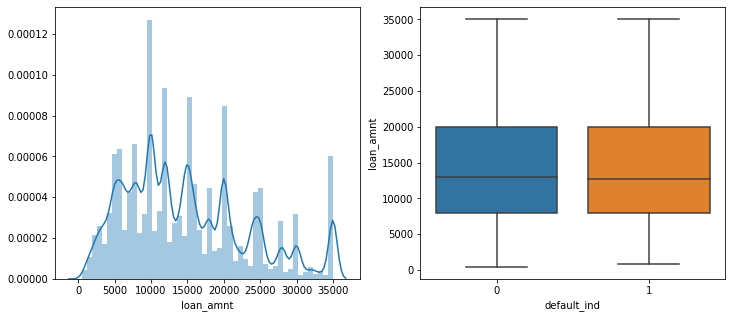

In [62]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_num['loan_amnt'],ax=ax[0])
sns.boxplot(x='default_ind',y='loan_amnt',data=df_num,ax=ax[1])

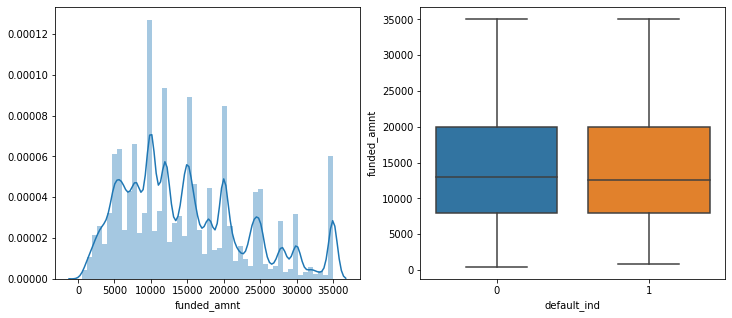

In [63]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_num['funded_amnt'],ax=ax[0])
sns.boxplot(x='default_ind',y='funded_amnt',data=df_num,ax=ax[1])

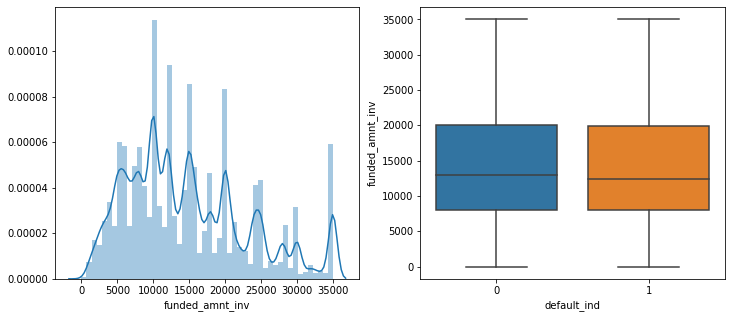

In [64]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_num['funded_amnt_inv'],ax=ax[0])
sns.boxplot(x='default_ind',y='funded_amnt_inv',data=df_num,ax=ax[1])

## Interest Rate 

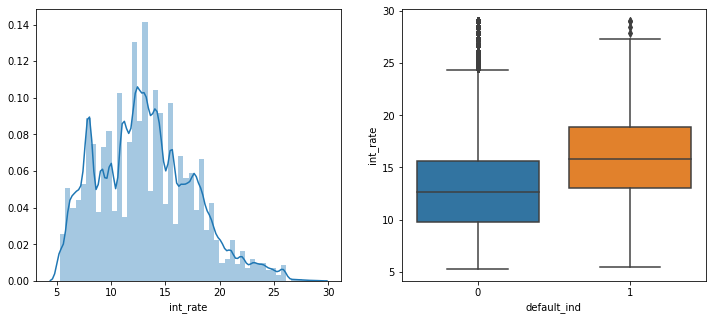

In [65]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_num['int_rate'],ax=ax[0])
sns.boxplot(x='default_ind',y='int_rate',data=df_num,ax=ax[1])

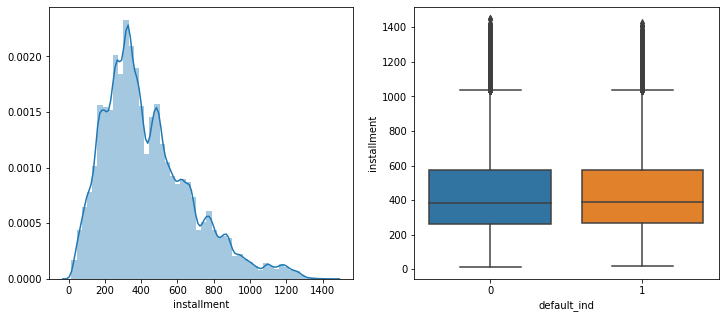

In [66]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_num['installment'],ax=ax[0])
sns.boxplot(x='default_ind',y='installment',data=df_num,ax=ax[1])

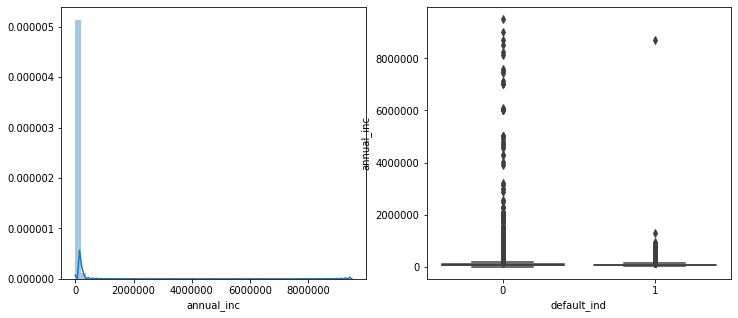

In [67]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_num['annual_inc'],ax=ax[0])
sns.boxplot(x='default_ind',y='annual_inc',data=df_num,ax=ax[1])

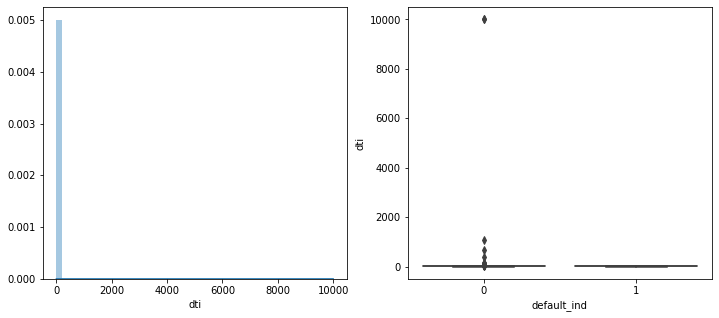

In [68]:
fig,ax=plt.subplots(1,2,figsize=(12,5)) #has outlier ->9999 value
sns.distplot(df_num['dti'],ax=ax[0])
sns.boxplot(x='default_ind',y='dti',data=df_num,ax=ax[1])

In [69]:
df_num['dti'].max()

9999.0

In [70]:
df_num['dti'].median()

17.61

In [71]:
df_num['dti'].replace({9999:17.61},inplace=True)
df['dti'].replace({9999:17.61},inplace=True)

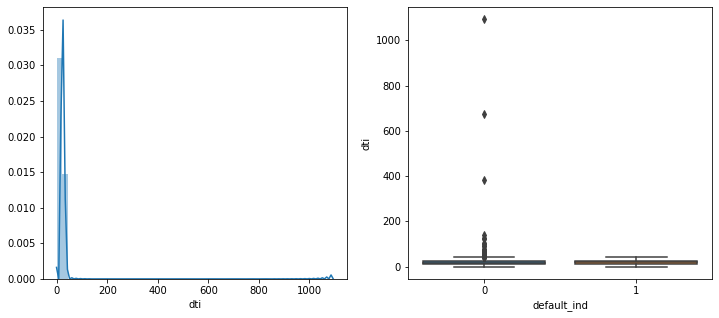

In [72]:
fig,ax=plt.subplots(1,2,figsize=(12,5)) #has outlier ->9999 value
sns.distplot(df_num['dti'],ax=ax[0])
sns.boxplot(x='default_ind',y='dti',data=df_num,ax=ax[1])

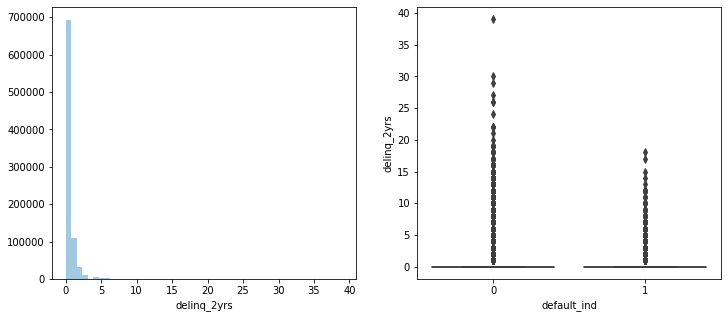

In [73]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_num['delinq_2yrs'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='delinq_2yrs',data=df_num,ax=ax[1])

In [74]:
df['delinq_2yrs'].value_counts()

0     692685
1     108733
2      32076
3      11410
4       5077
5       2583
6       1399
7        732
8        438
9        269
10       179
11       116
12        87
13        57
14        44
15        26
16        17
18        11
17        10
19         8
22         3
26         2
30         1
20         1
21         1
24         1
27         1
29         1
39         1
Name: delinq_2yrs, dtype: int64

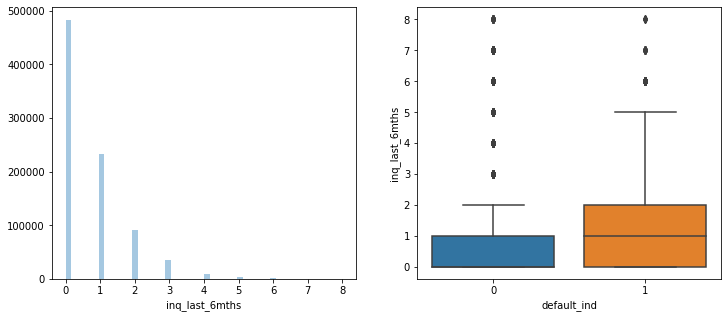

In [75]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_num['inq_last_6mths'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='inq_last_6mths',data=df_num,ax=ax[1])

In [76]:
df['inq_last_6mths'].value_counts() # should be categorical

0    482665
1    232983
2     90479
3     35902
4      9589
5      3359
6       922
7        48
8        22
Name: inq_last_6mths, dtype: int64

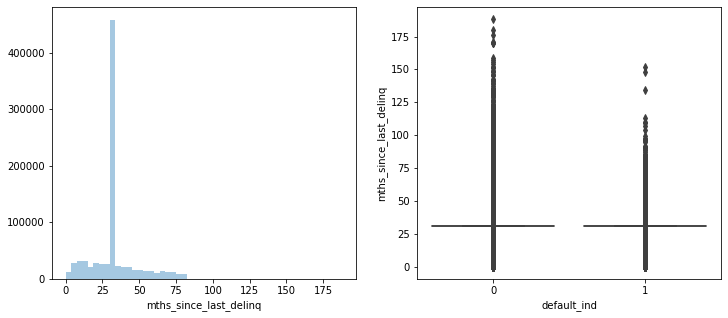

In [77]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_num['mths_since_last_delinq'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='mths_since_last_delinq',data=df_num,ax=ax[1])

In [78]:
df['mths_since_last_delinq'].value_counts()/len(df)

31.0     0.520993
9.0      0.009636
6.0      0.009450
12.0     0.009391
13.0     0.009345
           ...   
142.0    0.000001
143.0    0.000001
126.0    0.000001
154.0    0.000001
136.0    0.000001
Name: mths_since_last_delinq, Length: 155, dtype: float64

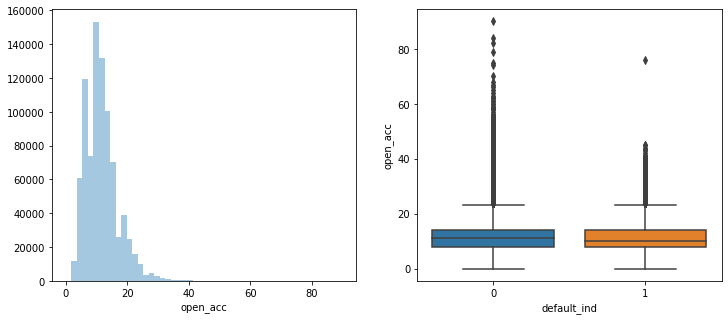

In [79]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_num['open_acc'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='open_acc',data=df_num,ax=ax[1])

In [80]:
df['open_acc'].value_counts()

9     77533
10    75611
8     73967
11    69742
7     65607
12    62415
13    54632
6     54020
14    46126
5     38420
15    38400
16    32123
17    26244
4     22505
18    21535
19    17610
20    13936
21    11134
3      9269
22     8965
23     7035
24     5623
25     4536
26     3268
27     2699
2      2610
28     2035
29     1680
30     1274
31     1007
32      894
33      666
34      518
35      425
36      330
37      274
38      207
1       186
39      184
40      131
41      108
42      104
43       68
45       46
44       42
46       35
48       32
47       27
49       23
51       17
53       16
50       13
52       12
55        7
0         6
56        6
58        4
54        4
59        2
60        2
61        2
62        2
84        1
70        1
82        1
79        1
76        1
75        1
74        1
65        1
68        1
67        1
66        1
64        1
63        1
57        1
90        1
Name: open_acc, dtype: int64

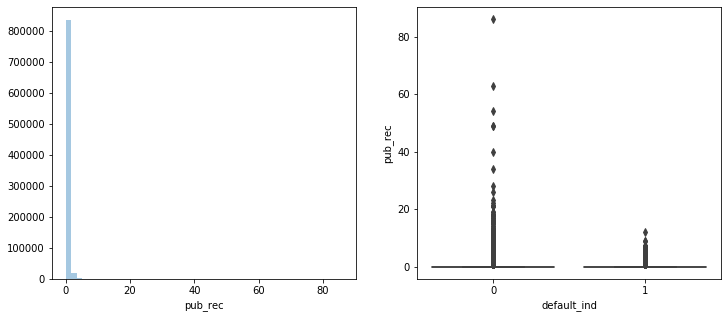

In [81]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_num['pub_rec'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='pub_rec',data=df_num,ax=ax[1])

In [82]:
df['pub_rec'].value_counts()

0     725455
1     108920
2      14250
3       4305
4       1496
5        728
6        366
7        167
8        110
9         46
10        41
11        21
12        14
13        12
15         6
16         5
18         5
21         4
17         3
14         2
19         2
49         2
63         1
22         1
23         1
26         1
28         1
34         1
40         1
54         1
86         1
Name: pub_rec, dtype: int64

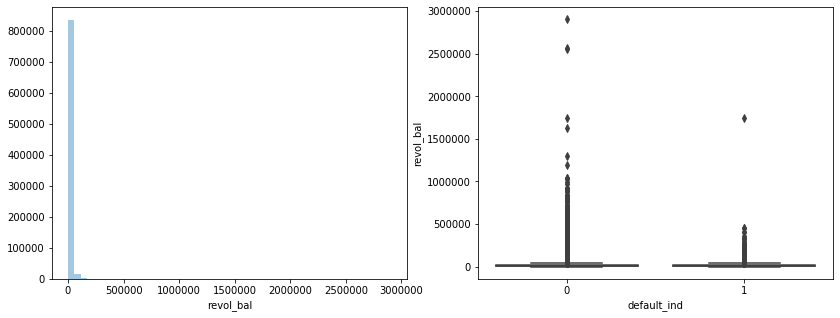

In [83]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.distplot(df_num['revol_bal'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='revol_bal',data=df_num,ax=ax[1])

In [84]:
df['revol_bal'].value_counts()

0        3194
5235       70
5466       70
8696       66
4479       66
         ... 
51400       1
49353       1
55498       1
53451       1
54501       1
Name: revol_bal, Length: 72779, dtype: int64

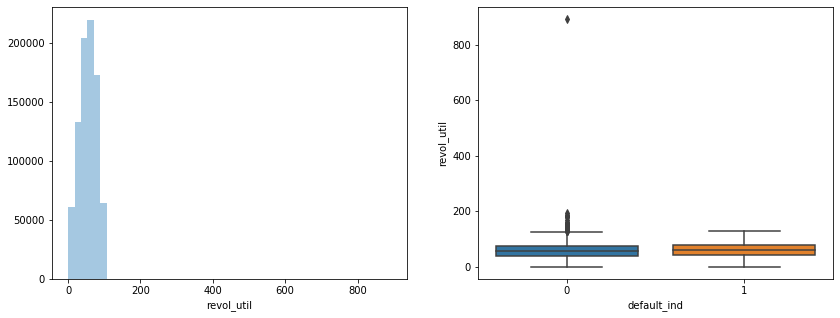

In [85]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.distplot(df_num['revol_util'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='revol_util',data=df_num,ax=ax[1])

In [86]:
df['revol_util'].value_counts()

0.00      3361
58.00     1723
53.00     1702
59.00     1694
61.00     1684
          ... 
153.00       1
125.60       1
152.50       1
17.78        1
120.80       1
Name: revol_util, Length: 1338, dtype: int64

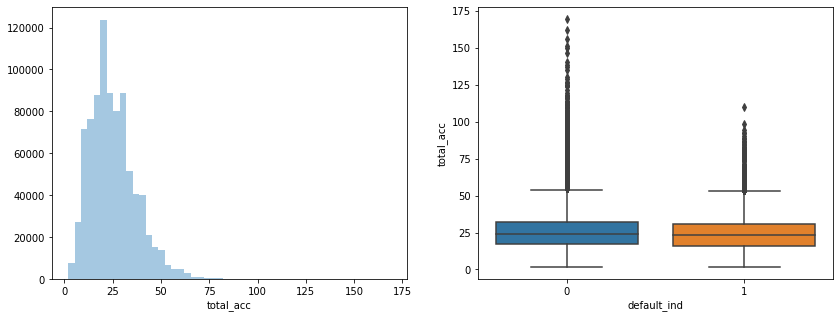

In [87]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.distplot(df_num['total_acc'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='total_acc',data=df_num,ax=ax[1])

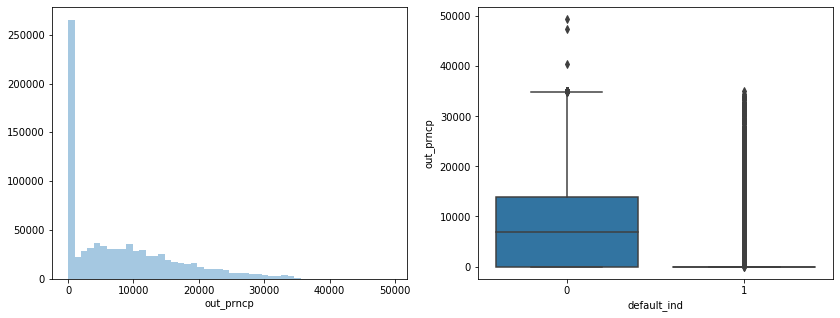

In [88]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.distplot(df_num['out_prncp'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='out_prncp',data=df_num,ax=ax[1])

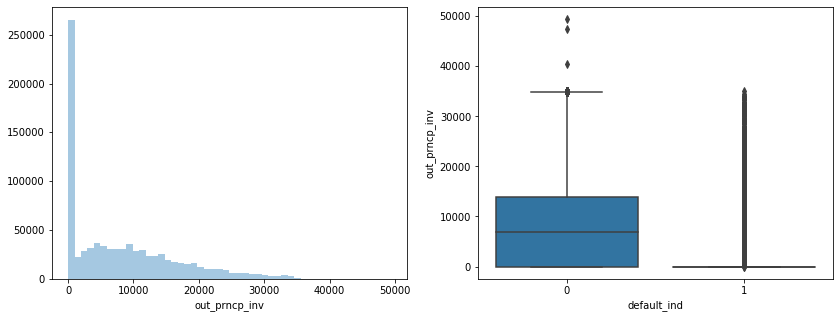

In [89]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) #can drop having same distribustion as out_prncp
sns.distplot(df_num['out_prncp_inv'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='out_prncp_inv',data=df_num,ax=ax[1])

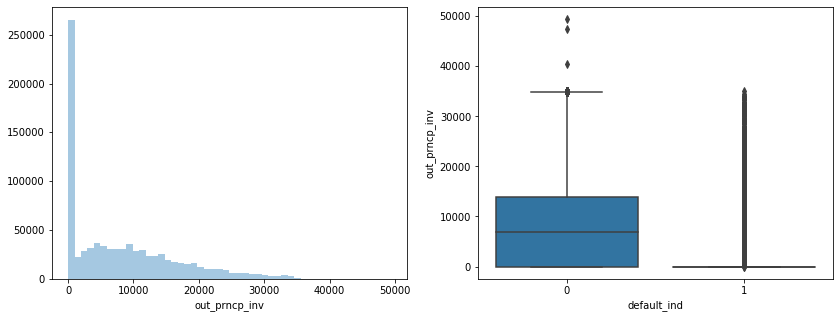

In [90]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) #can drop having same distribustion as out_prncp
sns.distplot(df_num['out_prncp_inv'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='out_prncp_inv',data=df_num,ax=ax[1])

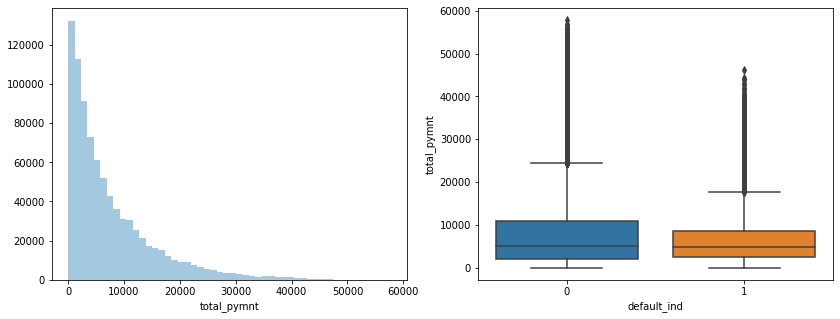

In [91]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.distplot(df_num['total_pymnt'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='total_pymnt',data=df_num,ax=ax[1])


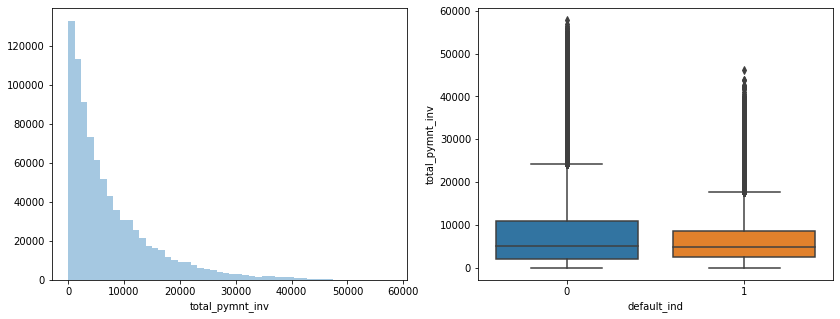

In [92]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) #can drop having same distribustion as total_pymnt
sns.distplot(df_num['total_pymnt_inv'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='total_pymnt_inv',data=df_num,ax=ax[1])

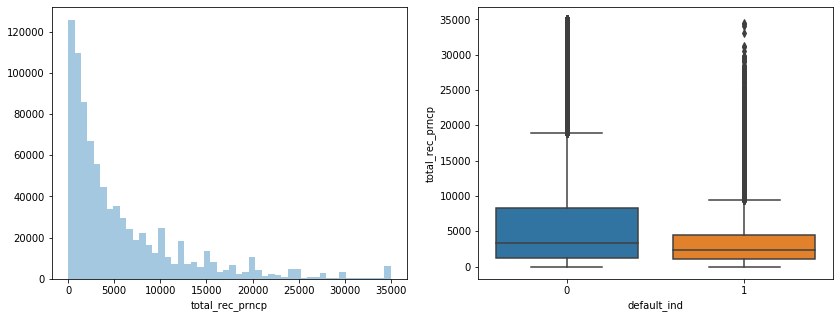

In [93]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) 
sns.distplot(df_num['total_rec_prncp'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='total_rec_prncp',data=df_num,ax=ax[1])

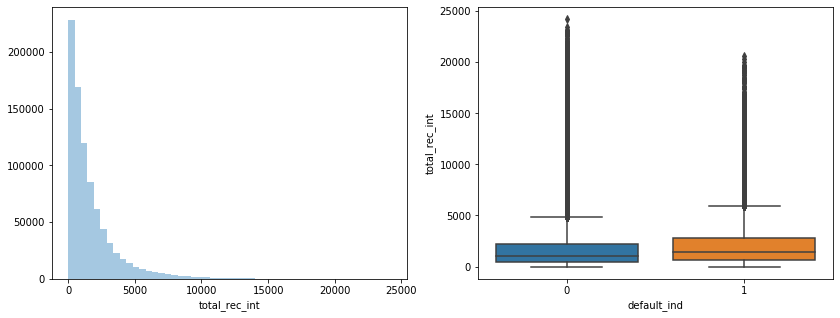

In [94]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) 
sns.distplot(df_num['total_rec_int'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='total_rec_int',data=df_num,ax=ax[1])

In [95]:
df_num['total_rec_int'].value_counts()

0.00       9362
82.76       138
174.90      123
71.33       123
283.29      119
           ... 
2271.47       1
9803.06       1
4178.21       1
9105.78       1
2286.54       1
Name: total_rec_int, Length: 317683, dtype: int64

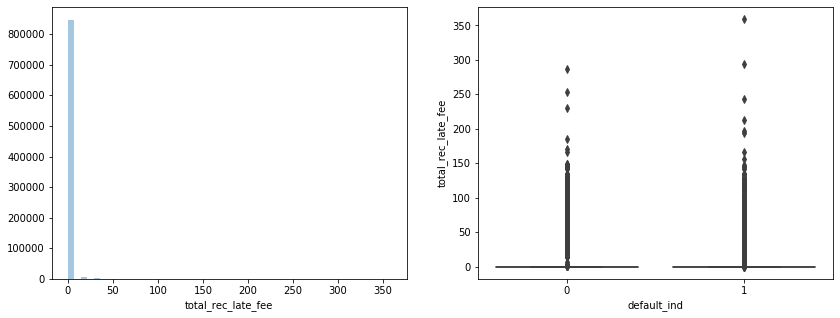

In [96]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) 
sns.distplot(df_num['total_rec_late_fee'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='total_rec_late_fee',data=df_num,ax=ax[1])

In [97]:
df_num['total_rec_late_fee'].value_counts() #95-5% distribution

0.000000     845995
15.000000      2269
30.000000       252
45.000000        30
16.370000        15
              ...  
18.630000         1
19.189504         1
21.030000         1
26.330000         1
14.946384         1
Name: total_rec_late_fee, Length: 5320, dtype: int64

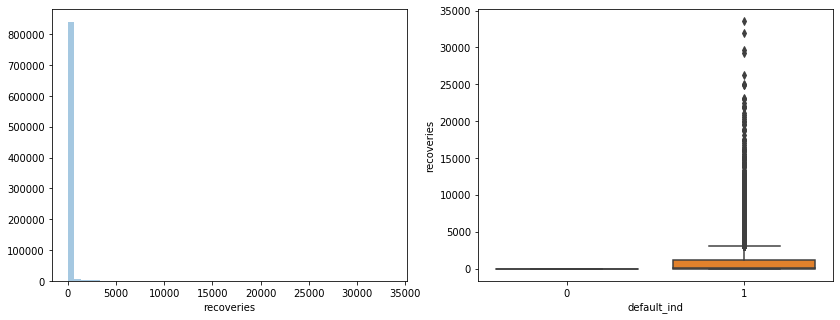

In [98]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) 
sns.distplot(df_num['recoveries'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='recoveries',data=df_num,ax=ax[1])

In [99]:
df_num['recoveries'].value_counts() #95-5% distribution

0.00       831782
200.00         10
11.70           9
14.28           9
800.00          8
            ...  
559.15          1
2680.58         1
3647.71         1
658.23          1
3192.87         1
Name: recoveries, Length: 22627, dtype: int64

In [100]:
df_num['recoveries'].value_counts().sort_values(ascending=False)

0.00       831782
200.00         10
11.70           9
14.28           9
800.00          8
            ...  
537.13          1
1428.60         1
3600.58         1
3284.85         1
4662.74         1
Name: recoveries, Length: 22627, dtype: int64

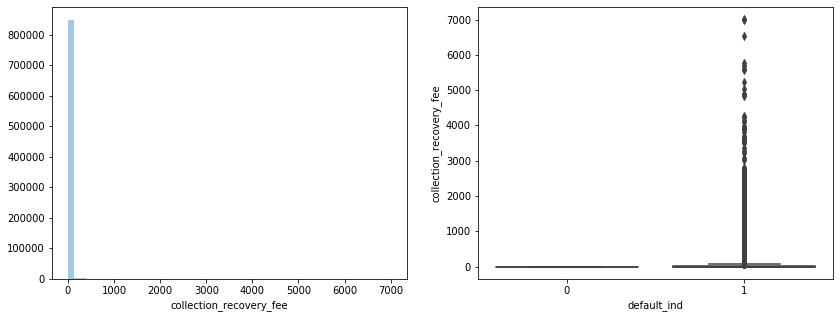

In [101]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) 
sns.distplot(df_num['collection_recovery_fee'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='collection_recovery_fee',data=df_num,ax=ax[1])

In [102]:
df_num['collection_recovery_fee'].value_counts().sort_values(ascending=False) #can be removed as we have recoveries both have same discription in the dictionary 

0.0000       832934
2.0000           15
2.5200           11
1.8800           11
4.5200           11
              ...  
8.7012            1
10.8934           1
705.3876          1
1118.3410         1
29.6966           1
Name: collection_recovery_fee, Length: 20388, dtype: int64

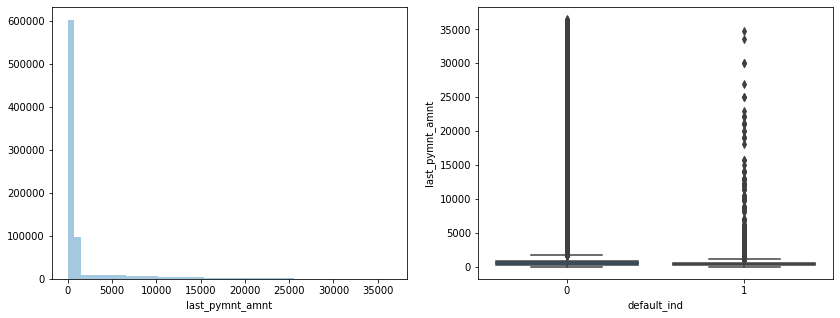

In [103]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) 
sns.distplot(df_num['last_pymnt_amnt'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='last_pymnt_amnt',data=df_num,ax=ax[1])

In [104]:
df_num['last_pymnt_amnt'].value_counts().sort_values(ascending=False)

0.00        8867
327.34      2053
318.79      1767
312.86      1437
392.81      1374
            ... 
21664.51       1
16324.98       1
12442.43       1
6380.50        1
12110.50       1
Name: last_pymnt_amnt, Length: 230321, dtype: int64

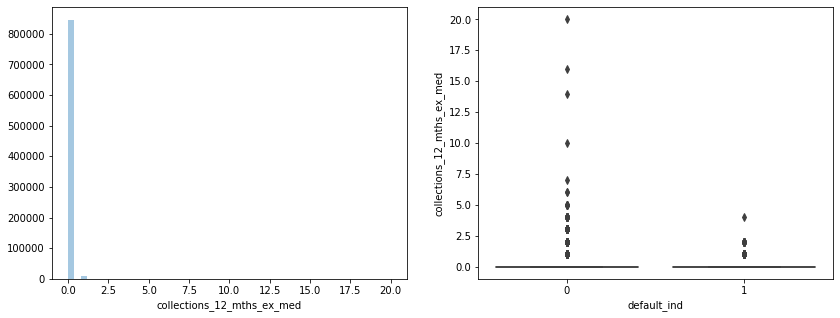

In [105]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) #can be dropped
sns.distplot(df_num['collections_12_mths_ex_med'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='collections_12_mths_ex_med',data=df_num,ax=ax[1])

In [106]:
df_num['collections_12_mths_ex_med'].value_counts().sort_values(ascending=False)

0.0     844824
1.0      10320
2.0        709
3.0         80
4.0         22
5.0          7
6.0          2
10.0         1
14.0         1
20.0         1
16.0         1
7.0          1
Name: collections_12_mths_ex_med, dtype: int64

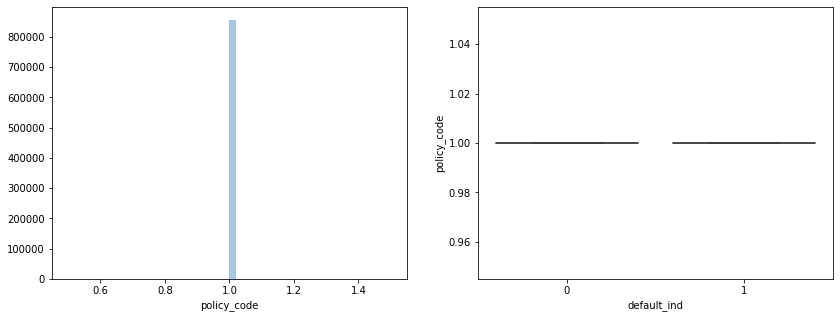

In [107]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) #can be dropped
sns.distplot(df_num['policy_code'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='policy_code',data=df_num,ax=ax[1])

In [108]:
df_num['policy_code'].value_counts().sort_values(ascending=False) #can be dropped has only one value

1    855969
Name: policy_code, dtype: int64

In [109]:
df.drop('policy_code',axis=1,inplace=True)

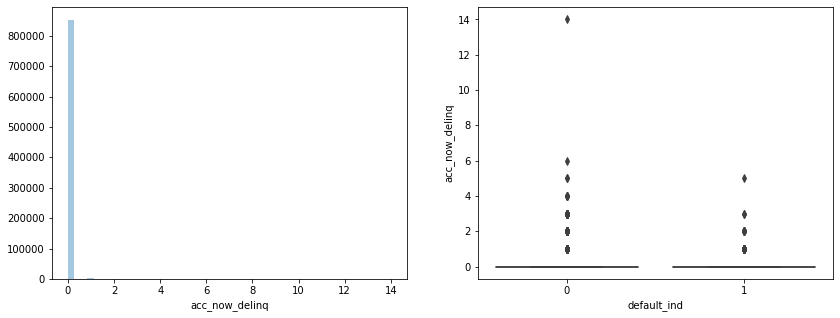

In [110]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) 
sns.distplot(df_num['acc_now_delinq'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='acc_now_delinq',data=df_num,ax=ax[1])

In [111]:
df_num['acc_now_delinq'].value_counts().sort_values(ascending=False)

0     852039
1       3693
2        198
3         28
4          6
5          3
6          1
14         1
Name: acc_now_delinq, dtype: int64

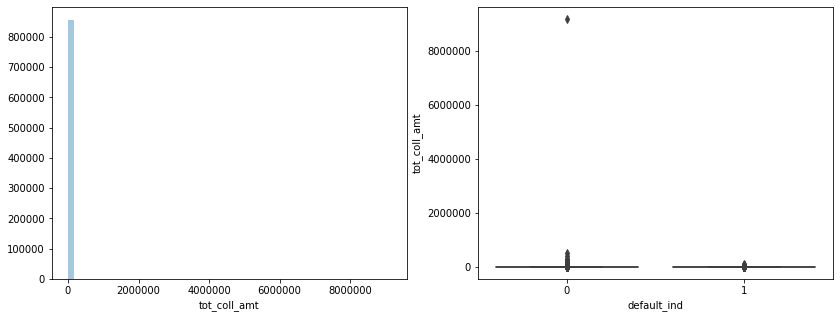

In [112]:
fig,ax=plt.subplots(1,2,figsize=(14,5)) 
sns.distplot(df_num['tot_coll_amt'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='tot_coll_amt',data=df_num,ax=ax[1])

In [113]:
df_num['tot_coll_amt'].value_counts().sort_values(ascending=False)

0.0        744375
50.0         1688
100.0        1307
75.0          998
200.0         688
            ...  
5898.0          1
6456.0          1
6444.0          1
6003.0          1
16451.0         1
Name: tot_coll_amt, Length: 10138, dtype: int64

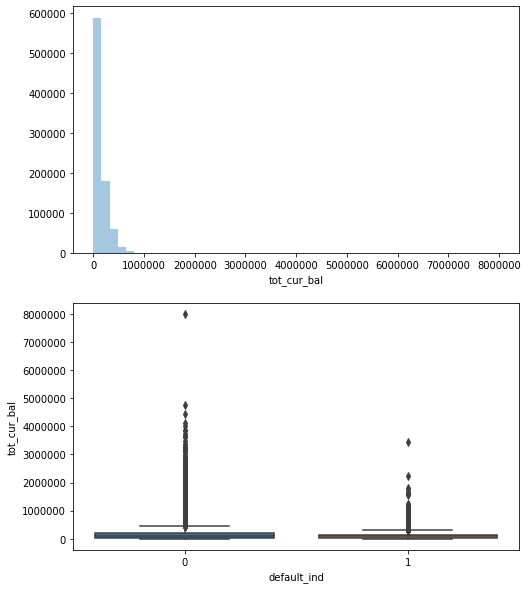

In [114]:
fig,ax=plt.subplots(2,1,figsize=(8,10))
sns.distplot(df_num['tot_cur_bal'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='tot_cur_bal',data=df_num,ax=ax[1])

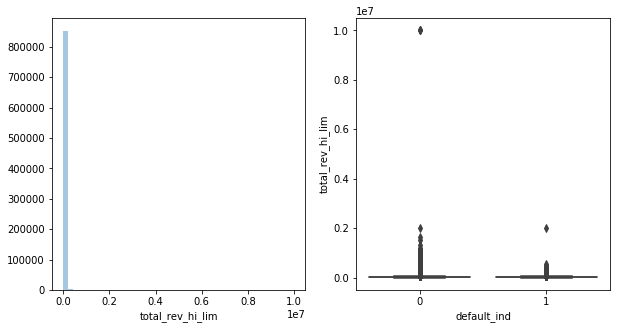

In [115]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_num['total_rev_hi_lim'],ax=ax[0],kde=False)
sns.boxplot(x='default_ind',y='total_rev_hi_lim',data=df_num,ax=ax[1])

In [116]:
df_num.shape

(855969, 33)

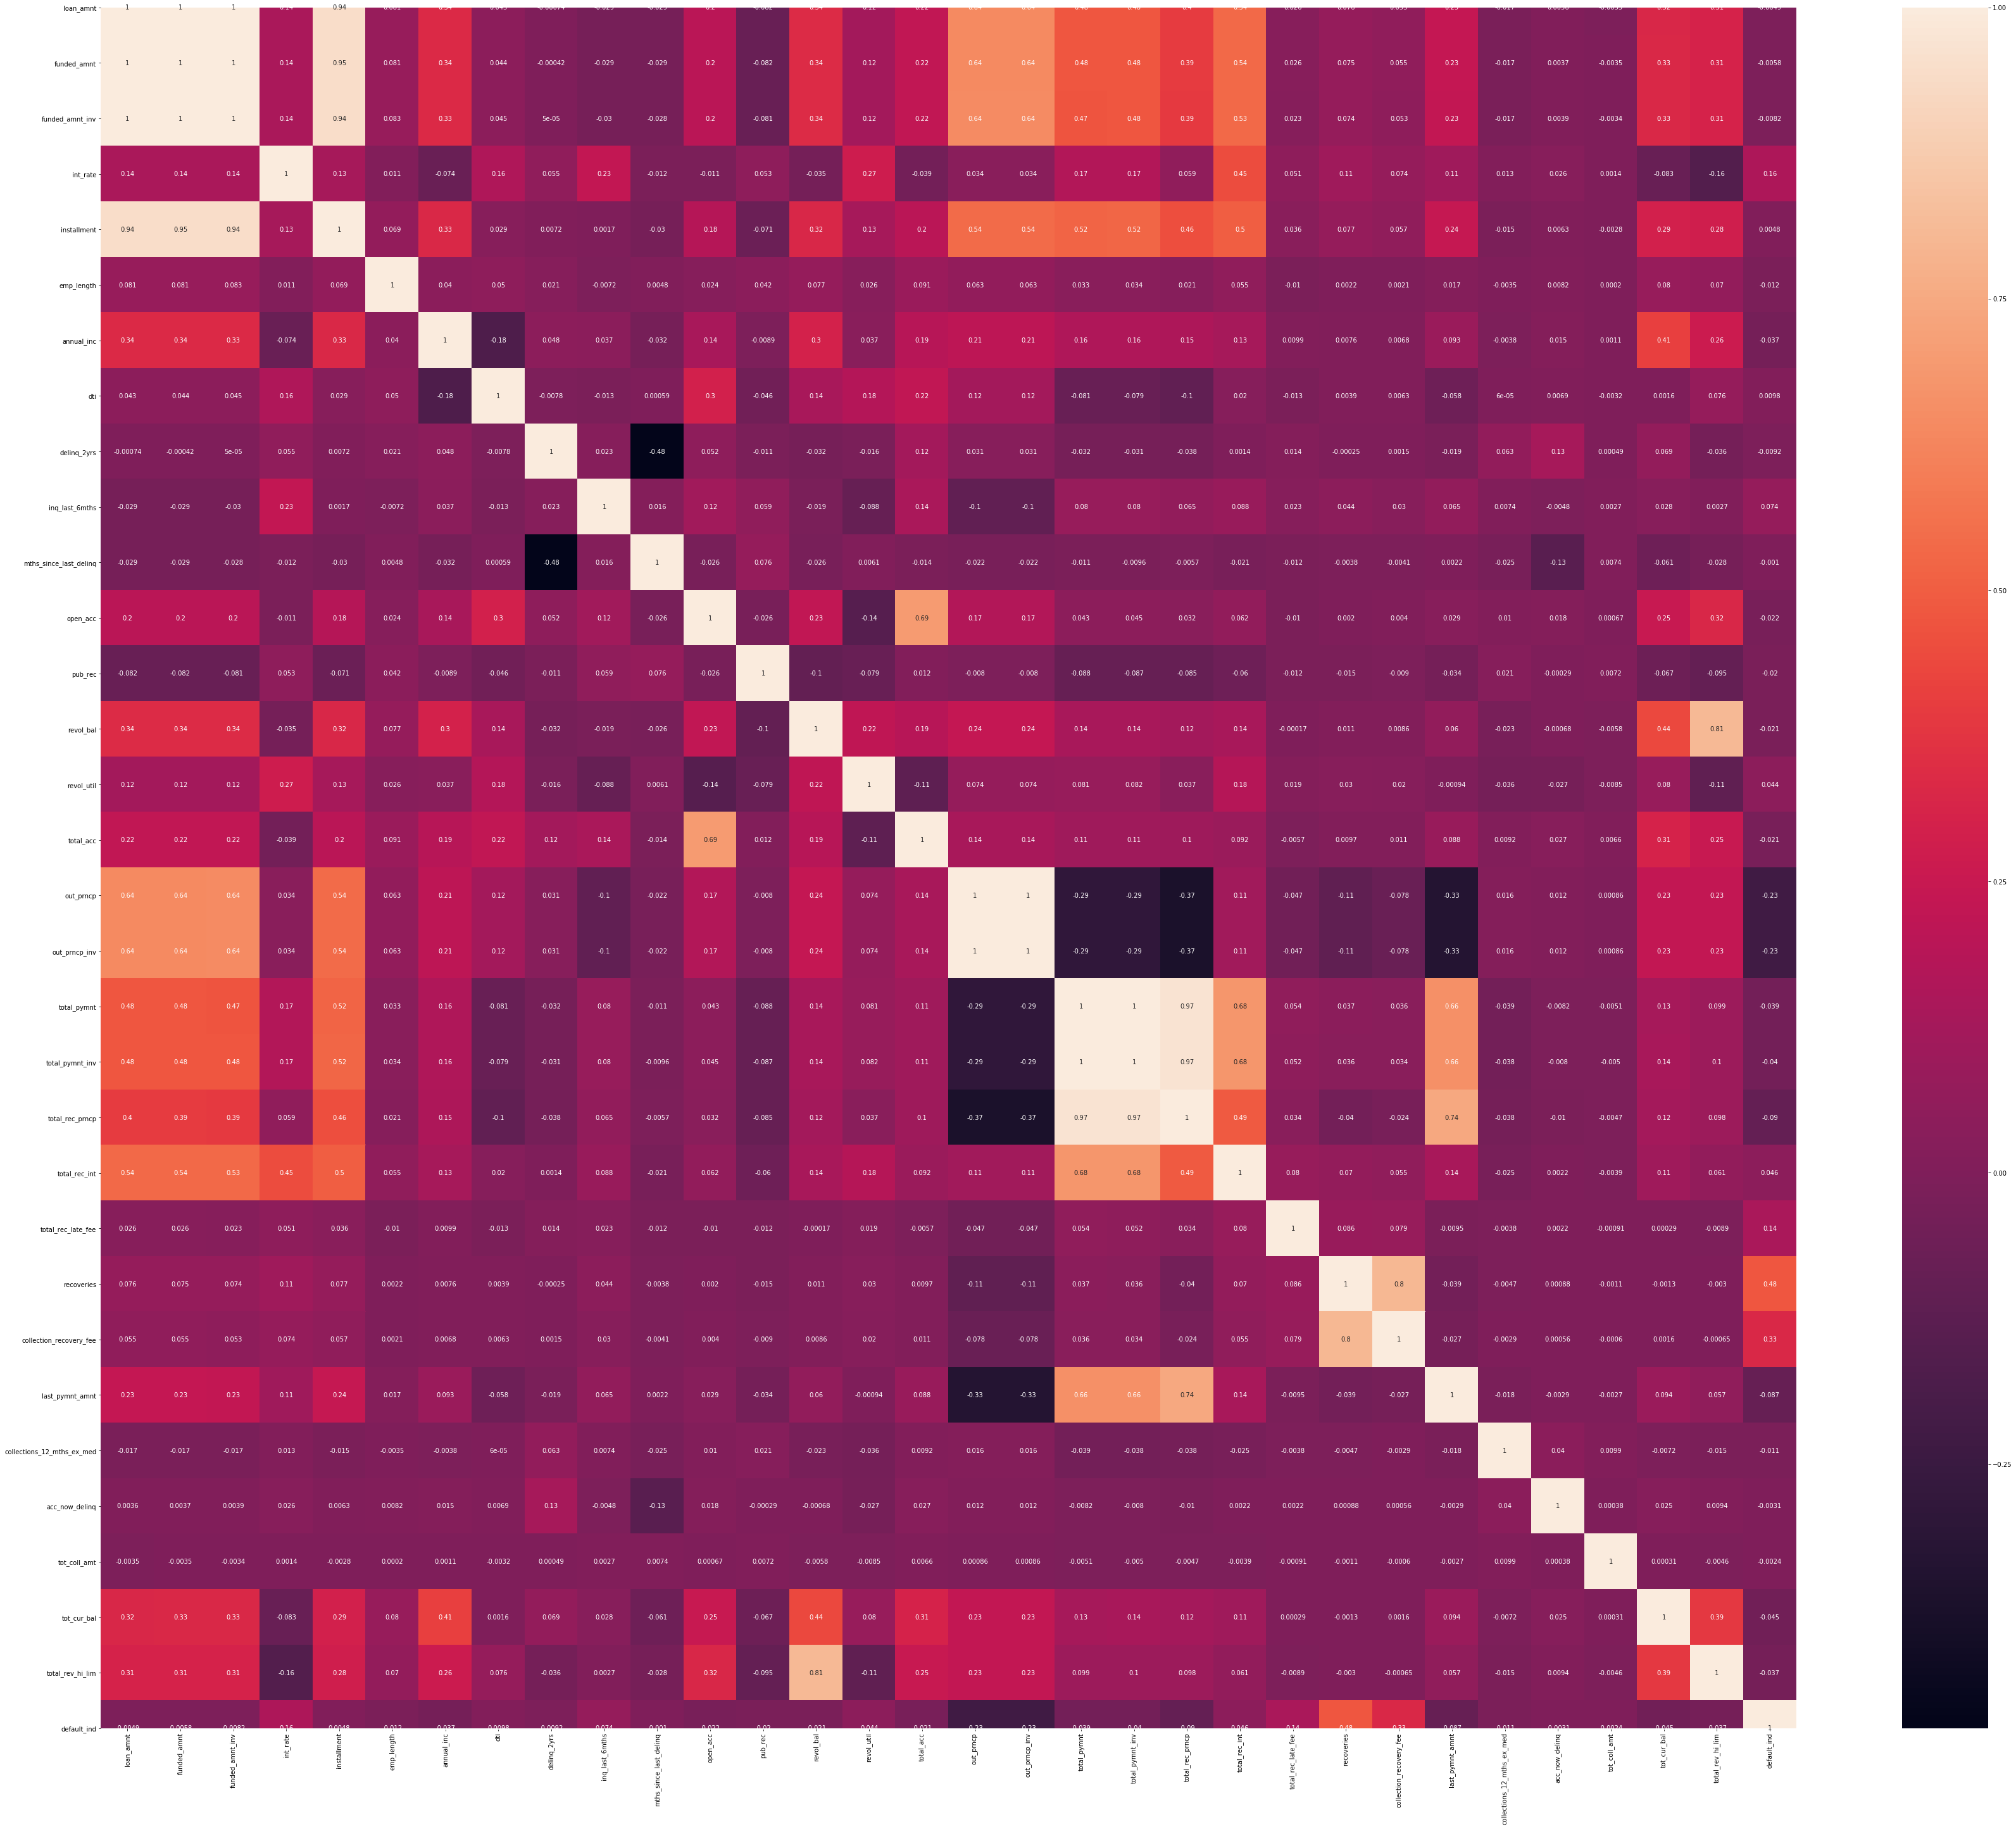

In [117]:
plt.figure(figsize=(60,50))
sns.heatmap(df.corr(),annot=True)

In [118]:
def checkcorrelation(dataset, threshold):
                col_corr = set()
                cor_matrix = dataset.corr()
                for i in range(len(cor_matrix.columns)):
                    for j in range(i):
                        if abs(cor_matrix.iloc[i, j]) > threshold:
                            colname = cor_matrix.columns[i]
                            col_corr.add(colname)
                return col_corr

high_corr=checkcorrelation(df_num, 0.8)

In [119]:
high_corr

{'collection_recovery_fee',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rev_hi_lim'}

## Chi square test to check significance of categorical variables

In [120]:
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
df['default_ind']=df['default_ind'].astype('object')
for i in df.columns:
        if df[i].dtypes=='object':
            print(i)

term
grade
home_ownership
verification_status
purpose
initial_list_status
default_ind


In [121]:
term_crosstab = pd.crosstab(df['term'], df['default_ind'], margins=True)
print(term_crosstab)

grade_crosstab = pd.crosstab(df['grade'], df['default_ind'], margins=True)
print(grade_crosstab)

home_ownership_crosstab = pd.crosstab(df['home_ownership'], df['default_ind'], margins=True)
print(home_ownership_crosstab)

verification_status_crosstab = pd.crosstab(df['verification_status'], df['default_ind'], margins=True)
print(verification_status_crosstab)

purpose_crosstab = pd.crosstab(df['purpose'], df['default_ind'], margins=True)
print(purpose_crosstab)

initial_list_status_crosstab = pd.crosstab(df['initial_list_status'], df['default_ind'], margins=True)
print(initial_list_status_crosstab)


default_ind       0      1     All
term                              
 36          570423  29798  600221
 60          239079  16669  255748
All          809502  46467  855969
default_ind       0      1     All
grade                             
A            143001   2664  145665
B            238281   9717  247998
C            223853  13002  236855
D            122004  10798  132802
E             59989   6459   66448
F             18315   3013   21328
G              4059    814    4873
All          809502  46467  855969
default_ind          0      1     All
home_ownership                       
ANY                  3      0       3
MORTGAGE        408730  20376  429106
NONE                38      7      45
OTHER              117     27     144
OWN              80001   4135   84136
RENT            320613  21922  342535
All             809502  46467  855969
default_ind               0      1     All
verification_status                       
Not Verified         245256  12486  257742
Sour

In [122]:
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P - Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
          print('Independent (fail to reject H0)')
    return expected

In [123]:
exp_table_1 = check_categorical_dependency(grade_crosstab, 0.95)

Chi-Square Statistic value = 13403.456907347838
P - Value = 0.0
Dependent (reject H0)


In [124]:
exp_table_2 = check_categorical_dependency(home_ownership_crosstab, 0.95)

Chi-Square Statistic value = 1118.3461959323886
P - Value = 6.556212312452423e-232
Dependent (reject H0)


In [125]:
exp_table_3 = check_categorical_dependency(verification_status_crosstab, 0.95)

Chi-Square Statistic value = 2205.164040796204
P - Value = 0.0
Dependent (reject H0)


In [126]:
exp_table_4 = check_categorical_dependency(purpose_crosstab, 0.95)

Chi-Square Statistic value = 3097.8379928107593
P - Value = 0.0
Dependent (reject H0)


In [127]:
exp_table_5 = check_categorical_dependency(initial_list_status_crosstab, 0.95)

Chi-Square Statistic value = 8357.478966776616
P - Value = 0.0
Dependent (reject H0)


In [128]:
exp_table_6 = check_categorical_dependency(term_crosstab, 0.95)

Chi-Square Statistic value = 842.743948527297
P - Value = 4.228358894843645e-181
Dependent (reject H0)


In [129]:
# Features that have same values for many rows

quasi_constant_feat = []
for feature in df.columns:
    dominant = (df[feature].value_counts() / np.float(len(df))).sort_values(ascending=False).values[0]
    if dominant > 0.90:
        quasi_constant_feat.append(feature)
print(quasi_constant_feat)

['total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'default_ind']


In [130]:
df.shape

(855969, 39)

In [131]:
data = df.copy()

In [138]:
data.shape

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [141]:
X=data.drop(['default_ind', 'issue_d'],axis=1)
Y=data['default_ind']

In [142]:
X=pd.get_dummies(X,drop_first=True)
X.dtypes

loan_amnt                                int64
funded_amnt                              int64
funded_amnt_inv                        float64
int_rate                               float64
installment                            float64
emp_length                             float64
annual_inc                             float64
dti                                    float64
delinq_2yrs                              int64
inq_last_6mths                           int64
mths_since_last_delinq                 float64
open_acc                                 int64
pub_rec                                  int64
revol_bal                                int64
revol_util                             float64
total_acc                                int64
out_prncp                              float64
out_prncp_inv                          float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64
total_rec_int

In [143]:
Y=Y.astype('int64')

## One Many Anova for checking variable significance with target

In [144]:
from sklearn.feature_selection import f_classif

In [145]:
pvalue=f_classif(X,Y)[1]

In [146]:
pvalue=pd.Series(pvalue)

In [147]:
p_val=pd.DataFrame(pvalue,columns=['P-value'])
p_val['Feature']=X.columns

In [148]:
p_val

,P-value,Feature
0,5.632832e-06,loan_amnt
1,8.177662e-08,funded_amnt
2,3.082008e-14,funded_amnt_inv
3,0.000000e+00,int_rate
4,1.095312e-05,installment
5,2.777386e-28,emp_length
6,6.637872e-258,annual_inc
7,9.226484e-20,dti
8,1.919199e-17,delinq_2yrs
9,0.000000e+00,inq_last_6mths


In [149]:
p_val[p_val['P-value']==0.00]['Feature']

3                         int_rate
9                   inq_last_6mths
14                      revol_util
16                       out_prncp
17                   out_prncp_inv
20                 total_rec_prncp
21                   total_rec_int
22              total_rec_late_fee
23                      recoveries
24         collection_recovery_fee
25                 last_pymnt_amnt
29                     tot_cur_bal
32                         grade_B
34                         grade_D
35                         grade_E
36                         grade_F
44    verification_status_Verified
55          purpose_small_business
58           initial_list_status_w
Name: Feature, dtype: object

In [150]:
p_val[p_val['P-value']>0.05]['Feature']

10    mths_since_last_delinq
33                   grade_C
50    purpose_major_purchase
Name: Feature, dtype: object

In [151]:
var_to_keep=p_val[p_val['P-value']<0.05]['Feature'].values

In [152]:
var_to_keep

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'term_ 60 ',
       'grade_B', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_medical',
       'pur

## Highly important features

In [153]:
p_val.sort_values('P-value')

,P-value,Feature
29,0.000000e+00,tot_cur_bal
55,0.000000e+00,purpose_small_business
44,0.000000e+00,verification_status_Verified
36,0.000000e+00,grade_F
35,0.000000e+00,grade_E
34,0.000000e+00,grade_D
32,0.000000e+00,grade_B
25,0.000000e+00,last_pymnt_amnt
24,0.000000e+00,collection_recovery_fee
23,0.000000e+00,recoveries


In [ ]:
X.drop(['mths_since_last_delinq','purpose_vacation','purpose_major_purchase'],axis=1,inplace=True)

In [ ]:
p_val.sort_values('P-value')

<!-- # Highly significant variables as shown by p-val
# int_rate,installment,inq_last_6mths,revol_util,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
# recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,grade_B,grade_D,grade_E,grade_F,verification_status_Verified,purpose_small_business
# initial_list_status_w

# -------------------------------- without separate levels
# int_rate,installment,inq_last_6mths,revol_util,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
# recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,grade,verfication_status,purpose,initial_list_status -->

Highly significant as shown by p-value 
-------------------------------------------------------
int_rate,installment,inq_last_6mths,revol_util,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,grade_B,grade_D,grade_E,grade_F,verification_status_Verified,purpose_small_business
initial_list_status_w

----------------------------without individual categories
int_rate,installment,inq_last_6mths,revol_util,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,grade,verfication_status,purpose,initial_list_status

## Applying VIF for reducing multi-colinearity in data and feature selection

* Following feature can be dropped after analysing VIF score :

'issue_d', 'funded_amnt', 'funded_amnt_inv', 'total_pymnt_inv', 'out_prncp_inv', 'total_rec_prncp', 'installment', 'open_acc', 'revol_bal', 'acc_now_delinq'

* Can not be dropped : 'out_prncp'

In [ ]:
M=X.drop(['funded_amnt','funded_amnt_inv','total_rec_prncp','total_pymnt_inv','installment','out_prncp','out_prncp_inv','total_rec_int','open_acc','revol_bal'],axis=1)
#M=M.drop('grade_C',axis=1)
#M=M.drop('open_acc',axis=1)
#M=M.drop('revol_bal',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=pd.DataFrame()

In [ ]:
var=M.select_dtypes(include=['float64','int64','uint8'])

In [ ]:
vif['VIF']=[variance_inflation_factor(var.values,i) for i in range(var.shape[1])]

In [ ]:
vif['Features']=var.columns

In [ ]:
vif['VIF']=vif['VIF'].astype('int64')

In [ ]:
vif

## Scaling data using min-max scaler

In [ ]:
data=df.copy()

In [ ]:
data.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
for val in data:
    if(data[val].dtypes in ['int64', 'float64']):
        data[[val]] = scaler.fit_transform(data[[val]])

In [ ]:
data.default_ind.value_counts()

In [ ]:
# Dropping variables identified during VIF test

data.drop(['issue_d','funded_amnt','funded_amnt_inv','total_pymnt_inv','out_prncp_inv','total_rec_prncp','installment','open_acc','revol_bal','acc_now_delinq','mths_since_last_delinq'],axis=1,inplace=True)

In [ ]:
data.shape

## Stratified sampling

In [ ]:
data_0=data[data['default_ind']==0]

In [ ]:
data_1=data[data['default_ind']==1]

In [ ]:
data_0.shape,data_1.shape

In [ ]:
sample_0=data_0.sample(frac=0.7)

In [ ]:
sample_1=data_1.sample(frac=0.7)

In [ ]:
sample_0.shape,sample_1.shape

## Train Data

In [ ]:
df_new_train=pd.concat([sample_0,sample_1],axis=0)

In [ ]:
df_new_train.shape

In [ ]:
df_new_train.default_ind.value_counts()

## Test Data

In [ ]:
df_test_data=data.merge(df_new_train,indicator=True,how='left').loc[lambda x : x['_merge']=='left_only']

In [ ]:
df_test_data

In [ ]:
df_test_data._merge.value_counts()

In [ ]:
df_test_data.default_ind.value_counts()

In [ ]:
df_new_train.merge(df_test_data,how='inner') #cross checked if both train test have same data or not

In [ ]:
df_test_data.drop('_merge',axis=1,inplace=True)

In [ ]:
df_new_train.default_ind=df_new_train.default_ind.astype('int64')

In [ ]:
df_test_data.default_ind=df_test_data.default_ind.astype('int64')

In [ ]:
df_new_train=pd.get_dummies(df_new_train,drop_first=True)

In [ ]:
df_test_data=pd.get_dummies(df_test_data,drop_first=True)

In [ ]:
df_new_train.shape,df_test_data.shape

In [ ]:
df_new_train.drop(['purpose_vacation','purpose_major_purchase'],axis=1,inplace=True)
df_test_data.drop(['purpose_vacation','purpose_major_purchase'],axis=1,inplace=True)

In [ ]:
df_new_train.shape,df_test_data.shape

In [ ]:
X_Train=df_new_train.drop(['default_ind'],axis=1)
Y_Train=df_new_train['default_ind']
X_Test=df_test_data.drop(['default_ind'],axis=1)
Y_Test=df_test_data['default_ind']

In [ ]:
X_Train.shape,X_Test.shape

## Model Building

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logic=LogisticRegression(random_state=0)

In [ ]:
%%time
logic.fit(X_Train,Y_Train)

In [ ]:
pred_train=logic.predict(X_Train)

In [ ]:
pred=logic.predict(X_Test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score

In [ ]:
print(accuracy_score(Y_Train,pred_train))

In [ ]:
print(accuracy_score(Y_Test,pred))

In [ ]:
confusion=confusion_matrix(Y_Test,pred)

In [ ]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [ ]:
print('Accuracy : ',accuracy_score(Y_Test,pred))
print('\n')
print('Precision Score : ',precision_score(Y_Test,pred))
print('\n')
print('Sensitivity/Recall Score/TPR : ',recall_score(Y_Test,pred))
print('\n')
specificity = TN / (TN + FP)
print('Specificity : ',specificity,'\n')
print('FPR : ',(1-specificity)*100,'\n')
print('F1-Score : ',f1_score(Y_Test,pred))
print('\n')
print('Classification Error : ',(1-(accuracy_score(Y_Test,pred))),'\n')
print('Confusion Matrix : \n',confusion_matrix(Y_Test,pred))
print('\n')
print('Classification Report : \n',classification_report(Y_Test,pred))
print('\n')
print('ROC AUC Score : ',roc_auc_score(Y_Test,pred))

In [ ]:
fpr,tpr,thres=roc_curve(Y_Test,pred)

In [ ]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=120,criterion='gini', #entropy
                          oob_score=False,
                          max_features=2,min_samples_leaf=3,
                          random_state=0)

In [ ]:
%%time
rf.fit(X_Train,Y_Train)

In [ ]:
pred_train=rf.predict(X_Train)

In [ ]:
print(accuracy_score(Y_Train,pred_train))

In [ ]:
pred=rf.predict(X_Test)

In [ ]:
confusion=confusion_matrix(Y_Test,pred)

In [ ]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [ ]:
print('Accuracy : ',accuracy_score(Y_Test,pred))
print('\n')
print('Precision Score : ',precision_score(Y_Test,pred))
print('\n')
print('Sensitivity/Recall Score/TPR : ',recall_score(Y_Test,pred))
print('\n')
specificity = TN / (TN + FP)
print('Specificity : ',specificity,'\n')
print('FPR : ',(1-specificity)*100,'\n')
print('F1-Score : ',f1_score(Y_Test,pred))
print('\n')
print('Classification Error : ',(1-(accuracy_score(Y_Test,pred))),'\n')
print('Confusion Matrix : \n',confusion_matrix(Y_Test,pred))
print('\n')
print('Classification Report : \n',classification_report(Y_Test,pred))
print('\n')
print('ROC AUC Score : ',roc_auc_score(Y_Test,pred))

In [ ]:
fpr,tpr,thres=roc_curve(Y_Test,pred)

In [ ]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Optimal threshold selection using ROC curve

In [ ]:
pred=[]
for model in [rf,logic]:
    pred.append(pd.Series(model.predict_proba(X_Test)[:,1]))

In [ ]:
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
final_prediction

In [ ]:
print('Ensemble ROC-AUC Score',roc_auc_score(Y_Test,final_prediction))

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_Test,final_prediction)
thresholds

In [ ]:
accuracy_ls=[]
for thres in thresholds:
    final_y_pred=np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(Y_Test,final_y_pred,normalize=True))
accuracy_ls=pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns=['Threshold','Accuracy']
accuracy_ls.sort_values(by='Accuracy',ascending=False,inplace=True)
accuracy_ls.head(15)

## Re-running models again with new threshold- Taking optimal threshold as 0.23

## Random Forest

In [ ]:
y_valid=rf.predict_proba(X_Test)[:,1]

In [ ]:
y_rf_new=[]
for i in range(len(y_valid)):
    if y_valid[i]<=0.23: 
        y_rf_new.append(0)
    else:
        y_rf_new.append(1)

In [ ]:
confusion=confusion_matrix(Y_Test,y_rf_new)

In [ ]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [ ]:
#0.4
print('Accuracy : ',accuracy_score(Y_Test,y_rf_new))
print('\n')
print('Precision Score : ',precision_score(Y_Test,y_rf_new))
print('\n')
print('Sensitivity/Recall Score/TPR : ',recall_score(Y_Test,y_rf_new))
print('\n')
specificity = TN / (TN + FP)
print('Specificity : ',specificity,'\n')
print('FPR : ',(1-specificity)*100,'\n')
print('F1-Score : ',f1_score(Y_Test,y_rf_new))
print('\n')
print('Classification Error : ',(1-(accuracy_score(Y_Test,y_rf_new))),'\n')
print('Confusion Matrix : \n',confusion_matrix(Y_Test,y_rf_new))
print('\n')
print('Classification Report : \n',classification_report(Y_Test,y_rf_new))
print('\n')
print('ROC AUC Score : ',roc_auc_score(Y_Test,y_rf_new))

## Logistic Regression

In [ ]:
y_valid=logic.predict_proba(X_Test)[:,1]

In [ ]:
y_rf_new=[]
for i in range(len(y_valid)):
    if y_valid[i]<=0.23: 
        y_rf_new.append(0)
    else:
        y_rf_new.append(1)

In [ ]:
confusion=confusion_matrix(Y_Test,y_rf_new)

In [ ]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [ ]:
print('Accuracy : ',accuracy_score(Y_Test,y_rf_new))
print('\n')
print('Precision Score : ',precision_score(Y_Test,y_rf_new))
print('\n')
print('Sensitivity/Recall Score/TPR : ',recall_score(Y_Test,y_rf_new))
print('\n')
specificity = TN / (TN + FP)
print('Specificity : ',specificity,'\n')
print('FPR : ',(1-specificity)*100,'\n')
print('F1-Score : ',f1_score(Y_Test,y_rf_new))
print('\n')
print('Classification Error : ',(1-(accuracy_score(Y_Test,y_rf_new))),'\n')
print('Confusion Matrix : \n',confusion_matrix(Y_Test,y_rf_new))
print('\n')
print('Classification Report : \n',classification_report(Y_Test,y_rf_new))
print('\n')
print('ROC AUC Score : ',roc_auc_score(Y_Test,y_rf_new))

## Performing Stratified K-fold cross validation

In [ ]:
X=data.drop(['default_ind'],axis=1)
Y=data['default_ind']

In [ ]:
X=pd.get_dummies(X,drop_first=True)
Y=Y.astype('int64')

## Logistic Regression

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,Y)

In [ ]:
accuracy=[]
precision=[]
recall=[]
con_mtx=[]
roc_auc=[]

for train_index,test_index in skf.split(X,Y):
    print('Train : ',train_index,'Test : ',test_index)
    X1_train,X1_test=X.iloc[train_index],X.iloc[test_index]
    Y1_train,Y1_test=Y.iloc[train_index],Y.iloc[test_index]
    
    logic.fit(X1_train,Y1_train)
   # prediction=logic.predict(X1_test)
    prediction=logic.predict_proba(X1_test)[:,1]
    y_rf_new=[]
    for i in range(len(prediction)):
        if prediction[i]<=0.23: 
            y_rf_new.append(0)
        else:
            y_rf_new.append(1)
    score=accuracy_score(Y1_test,y_rf_new)
    precise=precision_score(Y1_test,y_rf_new)
    re_call=recall_score(Y1_test,y_rf_new)
    confusion=confusion_matrix(Y1_test,y_rf_new)
    roc_auc_s=roc_auc_score(Y1_test,y_rf_new)
    
    accuracy.append(score)
    precision.append(precise)
    recall.append(re_call)
    con_mtx.append(confusion)
    roc_auc.append(roc_auc_s)

In [ ]:
print('Accuracy Score : ',accuracy)
print('Precison Score : ',precision)
print('Recall : ',recall)
print('ROC AUC Score : ',roc_auc)

In [ ]:
print('Accuracy : ',np.array(accuracy).min())

In [ ]:
print('Accuracy : ',np.array(accuracy).mean())
print('Precision : ',np.array(precision).mean())
print('Recall : ',np.array(recall).mean())
print('Confusion Matrix for all Iterations : \n',np.array(con_mtx))
print('ROC AUC Score : ',np.array(roc_auc).mean())

## Random Forest

In [ ]:
%%time
accuracy=[]
precision=[]
recall=[]
con_mtx=[]
roc_auc=[]

for train_index,test_index in skf.split(X,Y):
    print('Train : ',train_index,'Test : ',test_index)
    X1_train,X1_test=X.iloc[train_index],X.iloc[test_index]
    Y1_train,Y1_test=Y.iloc[train_index],Y.iloc[test_index]
    
    rf.fit(X1_train,Y1_train)
    #prediction=rf.predict(X1_test)
    prediction=rf.predict_proba(X1_test)[:,1]
    y_rf_new=[]
    for i in range(len(prediction)):
        if prediction[i]<=0.23: 
            y_rf_new.append(0)
        else:
            y_rf_new.append(1)
    score=accuracy_score(Y1_test,y_rf_new)
    precise=precision_score(Y1_test,y_rf_new)
    re_call=recall_score(Y1_test,y_rf_new)
    confusion=confusion_matrix(Y1_test,y_rf_new)
    roc_auc_s=roc_auc_score(Y1_test,y_rf_new)
    
    accuracy.append(score)
    precision.append(precise)
    recall.append(re_call)
    con_mtx.append(confusion)
    roc_auc.append(roc_auc_s)

In [ ]:
print('Accuracy Score : ',accuracy)
print('Precison Score : ',precision)
print('Recall : ',recall)
print('ROC AUC Score : ',roc_auc)

In [ ]:
print('Accuracy : ',np.array(accuracy).mean())
print('Precision : ',np.array(precision).mean())
print('Recall : ',np.array(recall).mean())
print('Confusion Matrix for all Iterations : \n',np.array(con_mtx))
print('ROC AUC Score : ',np.array(roc_auc).mean())